# Cardiovascular Disease


## Step1: Load Dataset and inspecting Dataframe

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Looking at the above information:
- ID need to be dropped
- Age provided is in days. We will leave it as it is
- Gender can be done gender-1 to convert it to binary
- ap_hi and ap_lo has negative numbers. This need to be fixed
- Gluc and Cholestrol need to be convereted to dummies

**Outlier Treatment**

In [5]:
df[(df.ap_hi>=400)]

# We will drop the BP above 400 as highest BP recorded is 370/360. Clearly the values are not recorded properly

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
9557,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1
13895,19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
17713,25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
23867,34120,16131,1,161,92.0,906,0,2,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1


In [6]:
df=df[~(df.ap_hi>=400)] # dropping a few rows

In [7]:
df[(df.ap_lo>df.ap_hi) & (df.ap_lo>300)]



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


In [8]:
df[ (df.ap_lo>300)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


From above we can see that the number of records with ap_lo>300 or ap_hi>ap_lo also seem to be errorneous. We would be dropping these records too

In [9]:
df=df[ ~(df.ap_lo>300)]

In [10]:
df[(df.ap_hi<0)| (df.ap_lo<0)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0
60106,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [11]:
# Take absolute value for the record with ap_hi <0 as clearly the data looks to be wrong and we can change it to positive

df[(df.ap_hi<0)]=df[(df.ap_hi<0)].abs()

In [12]:
# Drop the record with ap_lo <0 as clearly the data looks to be wrong

df=df[~(df.ap_lo<0)]

In [13]:
df.shape

(69007, 13)

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,69007.0,49967.115858,28846.500249,0.0,24996.5,50006.0,74859.5,99999.0
age,69007.0,19463.755373,2468.404709,10798.0,17656.0,19700.0,21323.0,23713.0
gender,69007.0,1.348733,0.476573,1.0,1.0,1.0,2.0,2.0
height,69007.0,164.359529,8.203974,55.0,159.0,165.0,170.0,250.0
weight,69007.0,74.117430,14.328768,11.0,65.0,72.0,82.0,200.0
ap_hi,69007.0,126.324576,17.721904,7.0,120.0,120.0,140.0,309.0
ap_lo,69007.0,81.332517,9.877428,0.0,80.0,80.0,90.0,190.0
cholesterol,69007.0,1.364369,0.678677,1.0,1.0,1.0,1.0,3.0
gluc,69007.0,1.225832,0.571784,1.0,1.0,1.0,1.0,3.0
smoke,69007.0,0.087861,0.283094,0.0,0.0,0.0,0.0,1.0


In [15]:
df[(df.ap_hi<df.ap_lo)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,681,19099,1,156,65.0,120,150,2,1,0,0,1,0
567,815,21281,1,168,78.0,14,90,2,1,0,0,1,1
636,913,20457,2,169,68.0,70,110,1,1,0,0,1,0
927,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,98039,21217,1,160,59.0,12,80,1,1,0,0,1,0
68742,98213,18755,1,158,74.0,14,90,1,1,0,0,1,1
68998,98568,19107,1,154,77.0,14,90,1,1,0,0,1,0
69137,98743,15442,2,176,65.0,12,80,1,1,0,0,1,0


In [16]:
# Need to remove the records where in the ap_hi is less than ap_lo

df=df[~(df.ap_hi<df.ap_lo)]

In [17]:
df.shape

(68733, 13)

We have dropped a total of 1267 records. That is 1.8% records which is not too high

## Step 2: Data Preparation

In [18]:
# Merge Weight and Height into 1 feature: BMI

df['BMI']=round(df['weight']/((df['height']/100)**2),2)

In [19]:
# Convert Gender to binary where 0: Female and 1: Male

df['gender']=df['gender']-1

In [20]:
# Convert numeric values in cholestrol to english text

df['cholesterol']=df['cholesterol'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})


# Convert numeric values for glucose to english text

df['gluc']=df['gluc'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})

Creating Dummy Variables

In [21]:
# Creating Dummy Variable for Cholestrol
d1=pd.get_dummies(df['cholesterol'],prefix='chol',drop_first=True)

# Creating Dummy Variable for Glucose
d2=pd.get_dummies(df['gluc'],prefix='gluc',drop_first=True)

df=pd.concat([df,d1,d2],axis=1)

In [22]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,chol_High,chol_Normal,gluc_High,gluc_Normal
0,0,18393,1,168,62.0,110,80,Normal,Normal,0,0,1,0,21.97,0,1,0,1
1,1,20228,0,156,85.0,140,90,High,Normal,0,0,1,1,34.93,1,0,0,1
2,2,18857,0,165,64.0,130,70,High,Normal,0,0,0,1,23.51,1,0,0,1
3,3,17623,1,169,82.0,150,100,Normal,Normal,0,0,1,1,28.71,0,1,0,1
4,4,17474,0,156,56.0,100,60,Normal,Normal,0,0,0,0,23.01,0,1,0,1


**Dropping repeated features**

In [23]:
df.drop(['id','cholesterol','gluc'],axis=1,inplace=True)

In [24]:
# Drop Height and Weight

df.drop(['height','weight'],axis=1,inplace=True)

In [25]:
df.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,chol_High,chol_Normal,gluc_High,gluc_Normal
0,18393,1,110,80,0,0,1,0,21.97,0,1,0,1
1,20228,0,140,90,0,0,1,1,34.93,1,0,0,1
2,18857,0,130,70,0,0,0,1,23.51,1,0,0,1
3,17623,1,150,100,0,0,1,1,28.71,0,1,0,1
4,17474,0,100,60,0,0,0,0,23.01,0,1,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68733 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68733 non-null  int64  
 1   gender       68733 non-null  int64  
 2   ap_hi        68733 non-null  int64  
 3   ap_lo        68733 non-null  int64  
 4   smoke        68733 non-null  int64  
 5   alco         68733 non-null  int64  
 6   active       68733 non-null  int64  
 7   cardio       68733 non-null  int64  
 8   BMI          68733 non-null  float64
 9   chol_High    68733 non-null  uint8  
 10  chol_Normal  68733 non-null  uint8  
 11  gluc_High    68733 non-null  uint8  
 12  gluc_Normal  68733 non-null  uint8  
dtypes: float64(1), int64(8), uint8(4)
memory usage: 5.5 MB


Data is ready for further processing

**Train-Test Split**

In [1]:
#Putting feature variables into X

X=df.drop('cardio',axis=1)

# Fetch Target varaible

y=df['cardio']

NameError: name 'df' is not defined

In [28]:
# Split the data

X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

**Data Scaling**

In [29]:
scaler=StandardScaler()
X_train[['age','BMI','ap_hi','ap_lo']]=scaler.fit_transform(X_train[['age','BMI','ap_hi','ap_lo']])

In [30]:
X_train.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,BMI,chol_High,chol_Normal,gluc_High,gluc_Normal
47701,1.244206,1,1.991395,0.901810,0,0,1,0.708702,0,1,0,1
33918,-0.867902,0,-0.998362,-1.166544,0,0,0,-0.737147,0,1,0,1
59648,-1.135663,0,0.795492,0.901810,0,0,1,0.467194,0,1,0,1
51300,-0.478617,0,0.197540,0.901810,0,0,0,-0.422067,0,1,0,1
30869,-1.758277,0,-0.998362,-1.166544,0,0,1,-0.577208,0,1,0,1


In [31]:
# Checking for Data Imbalance

df['cardio'].sum()/len(df) *100

49.46677723946285

## Step 3: Model Building

In [32]:
# Importing other ML packages

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics

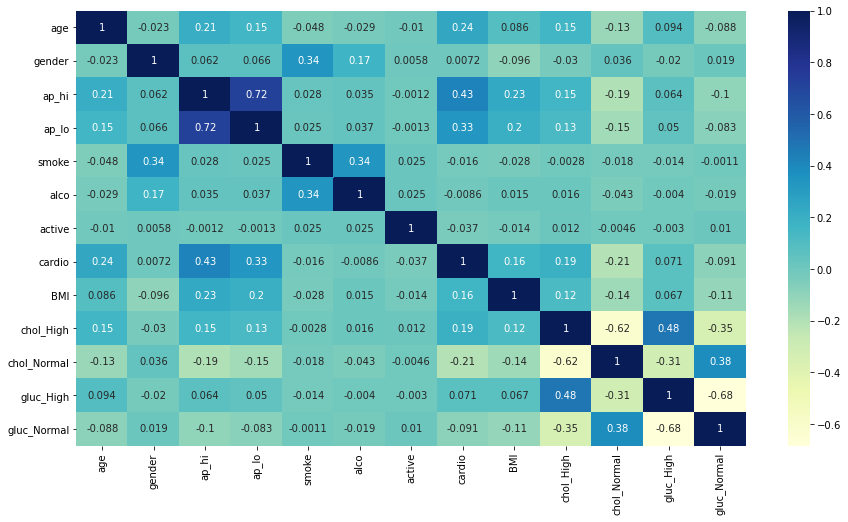

In [33]:
#before starting with  the Model building, checking the correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [34]:
X_train.shape

(48113, 12)

#### Model 1:

In [35]:
col=X_train.columns

In [36]:
X_train1=sm.add_constant(X_train[col])
ml1=sm.GLM(y_train, X_train1, family=sm.families.Binomial()).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                48113
Model:                            GLM   Df Residuals:                    48100
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27023.
Date:                Mon, 11 Oct 2021   Deviance:                       54047.
Time:                        08:38:27   Pearson chi2:                 6.54e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4860      0.049      9.976      0.000       0.391       0.582
age             0.3411      0.011     31.348      0.000       0.320       0.362
gender          0.0187      0.023      0.800      0.424      -0.027       0.065
ap_hi           0.9327      0.018     51.464      0.000       0.897       0.968
ap_lo           0.1216      0.016      7.512      0.000       0.090       0.153
smoke          -0.1360      0.042     -3.274      0.001      -0.217      -0.055
alco           -0.2568      0.050     -5.105      0.000      -0.355      -0.158
active         -0.2129      0.026     -8.152      0.000      -0.264      -0.162
BMI             0.1276      0.013     10.155      0.000       0.103       0.152
chol_High       0.7071      0.050     14.199      0.000       0.610       0.805
chol_Normal    -0.3838      0.033    -11.738      0.000      -0.448      -0.320
gluc_High      -0.3700      0.061     -6.084      0.000      -0.489      -0.251
gluc_Normal    -0.0303      0.043     -0.704      0.482      -0.115       0.054
===============================================================================
"""

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,gluc_Normal,7.88
9,chol_Normal,6.32
6,active,4.13
2,ap_hi,2.14
8,chol_High,2.11
3,ap_lo,2.06
10,gluc_High,1.92
1,gender,1.74
4,smoke,1.36
5,alco,1.20


gluc_Normal has very high p-Value as well as VIF. Droping the variable 

#### Model 2

In [39]:
col=col.drop('gluc_Normal',1)

In [40]:
X_train2=sm.add_constant(X_train[col])
ml2=sm.GLM(y_train, X_train2, family=sm.families.Binomial()).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                48113
Model:                            GLM   Df Residuals:                    48101
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27024.
Date:                Mon, 11 Oct 2021   Deviance:                       54047.
Time:                        08:38:29   Pearson chi2:                 6.54e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4634      0.037     12.657      0.000       0.392       0.535
age             0.3411      0.011     31.353      0.000       0.320       0.362
gender          0.0187      0.023      0.801      0.423      -0.027       0.065
ap_hi           0.9329      0.018     51.477      0.000       0.897       0.968
ap_lo           0.1216      0.016      7.513      0.000       0.090       0.153
smoke          -0.1359      0.042     -3.272      0.001      -0.217      -0.054
alco           -0.2564      0.050     -5.098      0.000      -0.355      -0.158
active         -0.2130      0.026     -8.159      0.000      -0.264      -0.162
BMI             0.1281      0.013     10.217      0.000       0.104       0.153
chol_High       0.7022      0.049     14.239      0.000       0.606       0.799
chol_Normal    -0.3901      0.031    -12.390      0.000      -0.452      -0.328
gluc_High      -0.3425      0.047     -7.357      0.000      -0.434      -0.251
===============================================================================
"""

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,active,3.40
9,chol_Normal,3.21
2,ap_hi,2.14
3,ap_lo,2.06
8,chol_High,1.74
1,gender,1.72
10,gluc_High,1.40
4,smoke,1.36
5,alco,1.20
7,BMI,1.08


p-value of gender is very high. Dropping the variable

#### Model 3

In [42]:
col=col.drop('gender',1)
X_train3=sm.add_constant(X_train[col])
ml3=sm.GLM(y_train, X_train3, family=sm.families.Binomial()).fit()
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                48113
Model:                            GLM   Df Residuals:                    48102
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27024.
Date:                Mon, 11 Oct 2021   Deviance:                       54048.
Time:                        08:38:30   Pearson chi2:                 6.55e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4684      0.036     12.983      0.000       0.398       0.539
age             0.3410      0.011     31.344      0.000       0.320       0.362
ap_hi           0.9334      0.018     51.531      0.000       0.898       0.969
ap_lo           0.1220      0.016      7.540      0.000       0.090       0.154
smoke          -0.1261      0.040     -3.177      0.001      -0.204      -0.048
alco           -0.2539      0.050     -5.057      0.000      -0.352      -0.156
active         -0.2131      0.026     -8.162      0.000      -0.264      -0.162
BMI             0.1270      0.012     10.198      0.000       0.103       0.151
chol_High       0.7023      0.049     14.241      0.000       0.606       0.799
chol_Normal    -0.3891      0.031    -12.370      0.000      -0.451      -0.327
gluc_High      -0.3425      0.047     -7.359      0.000      -0.434      -0.251
===============================================================================
"""

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,active,3.35
8,chol_Normal,3.03
1,ap_hi,2.14
2,ap_lo,2.06
7,chol_High,1.72
9,gluc_High,1.40
3,smoke,1.23
4,alco,1.19
0,age,1.07
6,BMI,1.07


p-value and VIF seems to be much better now.

Using the model to predict Y

## Step 4: Model Evaluation

In [44]:
y_predict=ml3.predict(X_train3)

In [45]:
y_predict.head()

47701    0.912872
33918    0.200298
59648    0.596482
51300    0.539142
30869    0.132294
dtype: float64

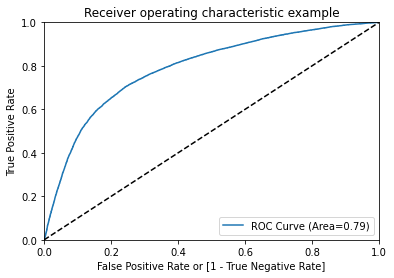

In [46]:
fpr, tpr, threshold= metrics.roc_curve(y_train, y_predict, drop_intermediate=False)
auc=metrics.roc_auc_score(y_train,y_predict)
plt.plot(fpr,tpr, label='ROC Curve (Area=%0.2f)' %auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [47]:
y_train_predict=pd.DataFrame({'Actual':y_train.values, 'Pred_Prob': y_predict.values})
y_train_predict.head()

,Actual,Pred_Prob
0,1,0.912872
1,0,0.200298
2,1,0.596482
3,0,0.539142
4,0,0.132294


**Optimal Cutoff**

In [48]:
num=[float(i)/10 for i in range(10)]

for i in num:
    y_train_predict[i]=y_train_predict['Pred_Prob'].apply(lambda x: 1 if x>i else 0)
y_train_predict.head()

,Actual,Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.912872,1,1,1,1,1,1,1,1,1,1
1,0,0.200298,1,1,1,0,0,0,0,0,0,0
2,1,0.596482,1,1,1,1,1,1,0,0,0,0
3,0,0.539142,1,1,1,1,1,1,0,0,0,0
4,0,0.132294,1,1,0,0,0,0,0,0,0,0


In [49]:
cut_off_mat=pd.DataFrame(columns=('Prob','Accuracy','Sensitivity','Specificity'))
for i in num:
    confusion=metrics.confusion_matrix(y_train_predict.Actual,y_train_predict[i])
    acc=(confusion[0,0]+confusion[1,1]) / sum(sum(confusion))
    sens= confusion[1,1]/(confusion[1,1]+confusion[1,0])
    spec= confusion[0,0]/(confusion[0,0]+confusion[0,1])
    
    cut_off_mat.loc[i]=[i,acc,sens,spec]
    
cut_off_mat

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.496082,1.000000,0.000000
0.1,0.1,0.515661,0.995182,0.043597
0.2,0.2,0.570740,0.971175,0.176531
0.3,0.3,0.646208,0.907952,0.388534
0.4,0.4,0.711450,0.800109,0.624170
0.5,0.5,0.727350,0.665200,0.788534
0.6,0.6,0.711325,0.553754,0.866447
0.7,0.7,0.669528,0.418678,0.916478
0.8,0.8,0.611020,0.263239,0.953392
0.9,0.9,0.547773,0.105916,0.982759


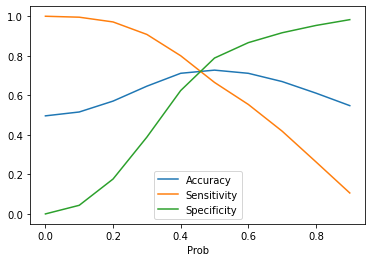

In [50]:
cut_off_mat.plot(x='Prob',y=['Accuracy','Sensitivity','Specificity'])
plt.show()

As seen from above somewhere around 0.4 we can see the three line merging. So we will take 0.4 as or cut-off probability

In [51]:
y_train_predict['Final_Pred']=y_train_predict['Pred_Prob'].apply(lambda x: 1 if x>0.4 else 0)

confusion=metrics.confusion_matrix(y_train_predict['Actual'],y_train_predict['Final_Pred'])
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [52]:
#Sesitivity
print('Sensitivity: ',confusion[1,1]/(confusion[1,1]+confusion[1,0]))

#Specificity
print('Specificity: ',confusion[0,0]/(confusion[0,0]+confusion[0,1]))

#Accuracy
print('Accuracy: ', (confusion[0,0]+confusion[1,1]) / sum(sum(confusion)))

#Recall
r=confusion[1,1]/(confusion[1,1]+confusion[1,0])
print('Recall: ',r)

#Precision
p=confusion[1,1]/(confusion[1,1]+confusion[0,1])
print('Precision: ',p)

#F1-Score
print('F1-Score: ',(2*p*r/(p+r)))


Sensitivity:  0.8001089324618736
Specificity:  0.6241699319447309
Accuracy:  0.7114501278240808
Recall:  0.8001089324618736
Precision:  0.6769825233081641
F1-Score:  0.7334139831403499


## Step 5: Model Prediction

In [53]:
X_test[['age','BMI','ap_hi','ap_lo']]=scaler.transform(X_test[['age','BMI','ap_hi','ap_lo']])

In [54]:
X_test=X_test[col]
X_test_sm=sm.add_constant(X_test)

y_test_prob = ml3.predict(X_test_sm)

In [55]:
y_test_pred = pd.DataFrame({"Test_Acutal":y_test.values, "Test_Prob":y_test_prob.values})
y_test_pred['Pred_Val']=y_test_pred.Test_Prob.apply(lambda x: 1 if x>0.4 else 0)

In [56]:
confusion2=metrics.confusion_matrix(y_test_pred['Test_Acutal'],y_test_pred['Pred_Val'])
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]
TP=confusion2[1,1]

In [57]:
#Sesitivity
print('Sensitivity: ',confusion2[1,1]/(confusion2[1,1]+confusion2[1,0]))

#Specificity
print('Specificity: ',confusion2[0,0]/(confusion2[0,0]+confusion2[0,1]))

#Accuracy
print('Accuracy: ', (confusion2[0,0]+confusion2[1,1]) / sum(sum(confusion2)))

#Recall
r=confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
print('Recall: ',r)

#Precision
p=confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])
print('Precision: ',p)

#F1-Score
print('F1-Score: ',(2*p*r/(p+r)))


Sensitivity:  0.798756415317805
Specificity:  0.6301487414187643
Accuracy:  0.7129970902036857
Recall:  0.798756415317805
Precision:  0.6759939859672569
F1-Score:  0.7322656532754253


## Final Summary

In [58]:
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                48113
Model:                            GLM   Df Residuals:                    48102
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27024.
Date:                Mon, 11 Oct 2021   Deviance:                       54048.
Time:                        08:38:33   Pearson chi2:                 6.55e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4684      0.036     12.983      0.000       0.398       0.539
age             0.3410      0.011     31.344      0.000       0.320       0.362
ap_hi           0.9334      0.018     51.531      0.000       0.898       0.969
ap_lo           0.1220      0.016      7.540      0.000       0.090       0.154
smoke          -0.1261      0.040     -3.177      0.001      -0.204      -0.048
alco           -0.2539      0.050     -5.057      0.000      -0.352      -0.156
active         -0.2131      0.026     -8.162      0.000      -0.264      -0.162
BMI             0.1270      0.012     10.198      0.000       0.103       0.151
chol_High       0.7023      0.049     14.241      0.000       0.606       0.799
chol_Normal    -0.3891      0.031    -12.370      0.000      -0.451      -0.327
gluc_High      -0.3425      0.047     -7.359      0.000      -0.434      -0.251
===============================================================================
"""

#### LOG(ODDS) = 0.4684 + 0.3410* AGE + 0.9334 * AP_HI + 0.1220 * AP_LO - 0.1261 * SMOKE - 0.2539 * ALCO - 0.2131 * ACTIVE -     0.7023 * CHOL_HIGH - 0.3891 * CHOL_NORMAL - 0.3425 * gluc_High + 0.1270 * BMI